# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [56]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
# 設定 data_path
dir_data = './data/'

In [58]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [59]:
#1
max_childern = max(app_train['CNT_CHILDREN'].values)
cut_rule = [0,0.1,2,5,max_childern]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels=["==0", "1-2", "3-5","over 5"])
app_train['CNT_CHILDREN_GROUP'].value_counts()

==0       215371
1-2        87868
3-5         4230
over 5        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [60]:
#2-1
grp = ["CNT_CHILDREN_GROUP","TARGET"]

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
==0                 0         166747.010980
                    1         160804.210548
1-2                 0         174590.584401
                    1         176115.362720
3-5                 0         175053.742913
                    1         160677.385714
over 5              0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

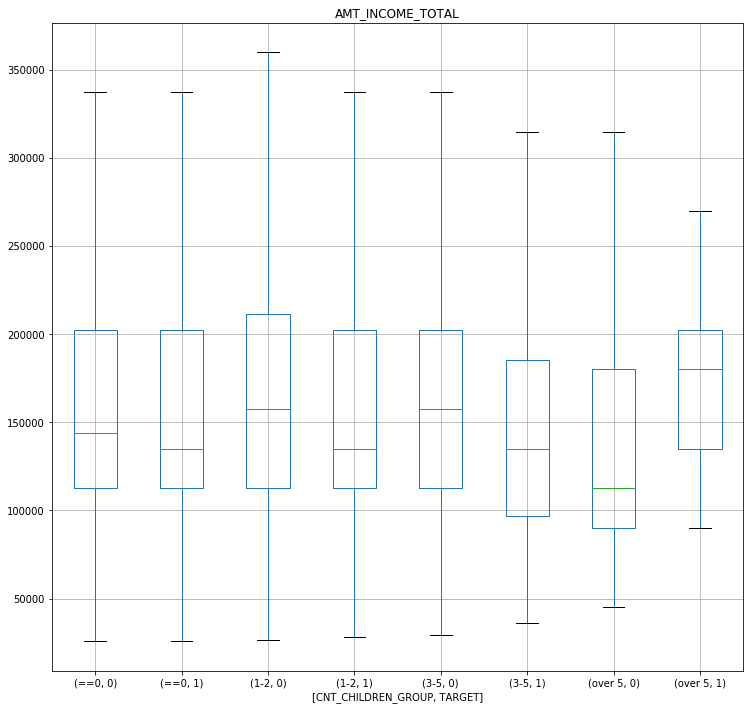

In [61]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ["CNT_CHILDREN_GROUP","TARGET"]

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [94]:
a = app_train.loc[0:100, ["AMT_INCOME_TOTAL","TARGET","CNT_CHILDREN_GROUP"]]

In [102]:
a

,AMT_INCOME_TOTAL,TARGET,CNT_CHILDREN_GROUP
0,202500.000,1,==0
1,270000.000,0,==0
2,67500.000,0,==0
3,135000.000,0,==0
4,121500.000,0,==0
5,99000.000,0,==0
6,171000.000,0,1-2
7,360000.000,0,==0
8,112500.000,0,==0
9,135000.000,0,==0


AMT_INCOME_TOTAL
TARGET CNT_CHILDREN_GROUP                  
0      ==0                         1.717582
       1-2                         1.656608
       3-5                         6.010408
       over 5                           NaN
1      ==0                         2.075235
       1-2                              NaN
       3-5                              NaN
       over 5                           NaN

In [111]:
pd.merge(a,pd.DataFrame(tmp['AMT_INCOME_TOTAL']))

,AMT_INCOME_TOTAL,TARGET,CNT_CHILDREN_GROUP


In [118]:
df

,a,b,c
0,2,2,3
1,2,1,3
2,3,1,0
3,4,2,1
4,4,3,3


In [132]:
app_train.loc[0:100, ["AMT_INCOME_TOTAL","TARGET","CNT_CHILDREN_GROUP"]]

,AMT_INCOME_TOTAL,TARGET,CNT_CHILDREN_GROUP
0,202500.000,1,==0
1,270000.000,0,==0
2,67500.000,0,==0
3,135000.000,0,==0
4,121500.000,0,==0
5,99000.000,0,==0
6,171000.000,0,1-2
7,360000.000,0,==0
8,112500.000,0,==0
9,135000.000,0,==0


In [137]:
df = pd.DataFrame(np.random.randint(5,size=(5,3)), columns=list('abc'))
print(df)
def f(req):
    #req = ser.values
    return (req-req.mean())/req.std()

#df.groupby('a').apply(f, n=10)

app_train.loc[0:100, ["AMT_INCOME_TOTAL","TARGET","CNT_CHILDREN_GROUP"]].groupby(["TARGET","CNT_CHILDREN_GROUP"]).apply(f, axis=1)

   a  b  c
0  2  1  0
1  4  4  3
2  0  4  0
3  0  4  1
4  3  0  4


TypeError: f() got an unexpected keyword argument 'axis'

In [160]:
a["AMT_INCOME_TOTAL"].reset_index()

,TARGET,CNT_CHILDREN_GROUP,AMT_INCOME_TOTAL
0,0,==0,1.717582
1,0,1-2,1.656608
2,0,3-5,6.010408
3,0,over 5,NaN
4,1,==0,2.075235
5,1,1-2,NaN
6,1,3-5,NaN
7,1,over 5,NaN


In [197]:
#3
tmp = app_train[["AMT_INCOME_TOTAL","TARGET","CNT_CHILDREN_GROUP"]].groupby(["TARGET","CNT_CHILDREN_GROUP"]).mean()
tmp = tmp["AMT_INCOME_TOTAL"].reset_index()
tmp.columns = ["TARGET","CNT_CHILDREN_GROUP",'a_mean']
tmp1 = app_train[["AMT_INCOME_TOTAL","TARGET","CNT_CHILDREN_GROUP"]].groupby(["TARGET","CNT_CHILDREN_GROUP"]).std()
tmp1 = tmp1["AMT_INCOME_TOTAL"].reset_index()
tmp1.columns = ["TARGET","CNT_CHILDREN_GROUP",'a_std']
tmp= pd.merge(app_train[['AMT_INCOME_TOTAL',"TARGET","CNT_CHILDREN_GROUP"]], tmp, how="outer")
tmp= pd.merge(tmp, tmp1, how="outer")
tmp['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = (tmp['AMT_INCOME_TOTAL']-tmp['a_mean'])/tmp['a_std']
tmp[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,112500.0,-0.569423
2,202500.0,0.491521
3,135000.0,-0.304187
4,81000.0,-0.940753
